<a href="https://colab.research.google.com/github/Astrocitos/TeamML/blob/main/SVD_Equipo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

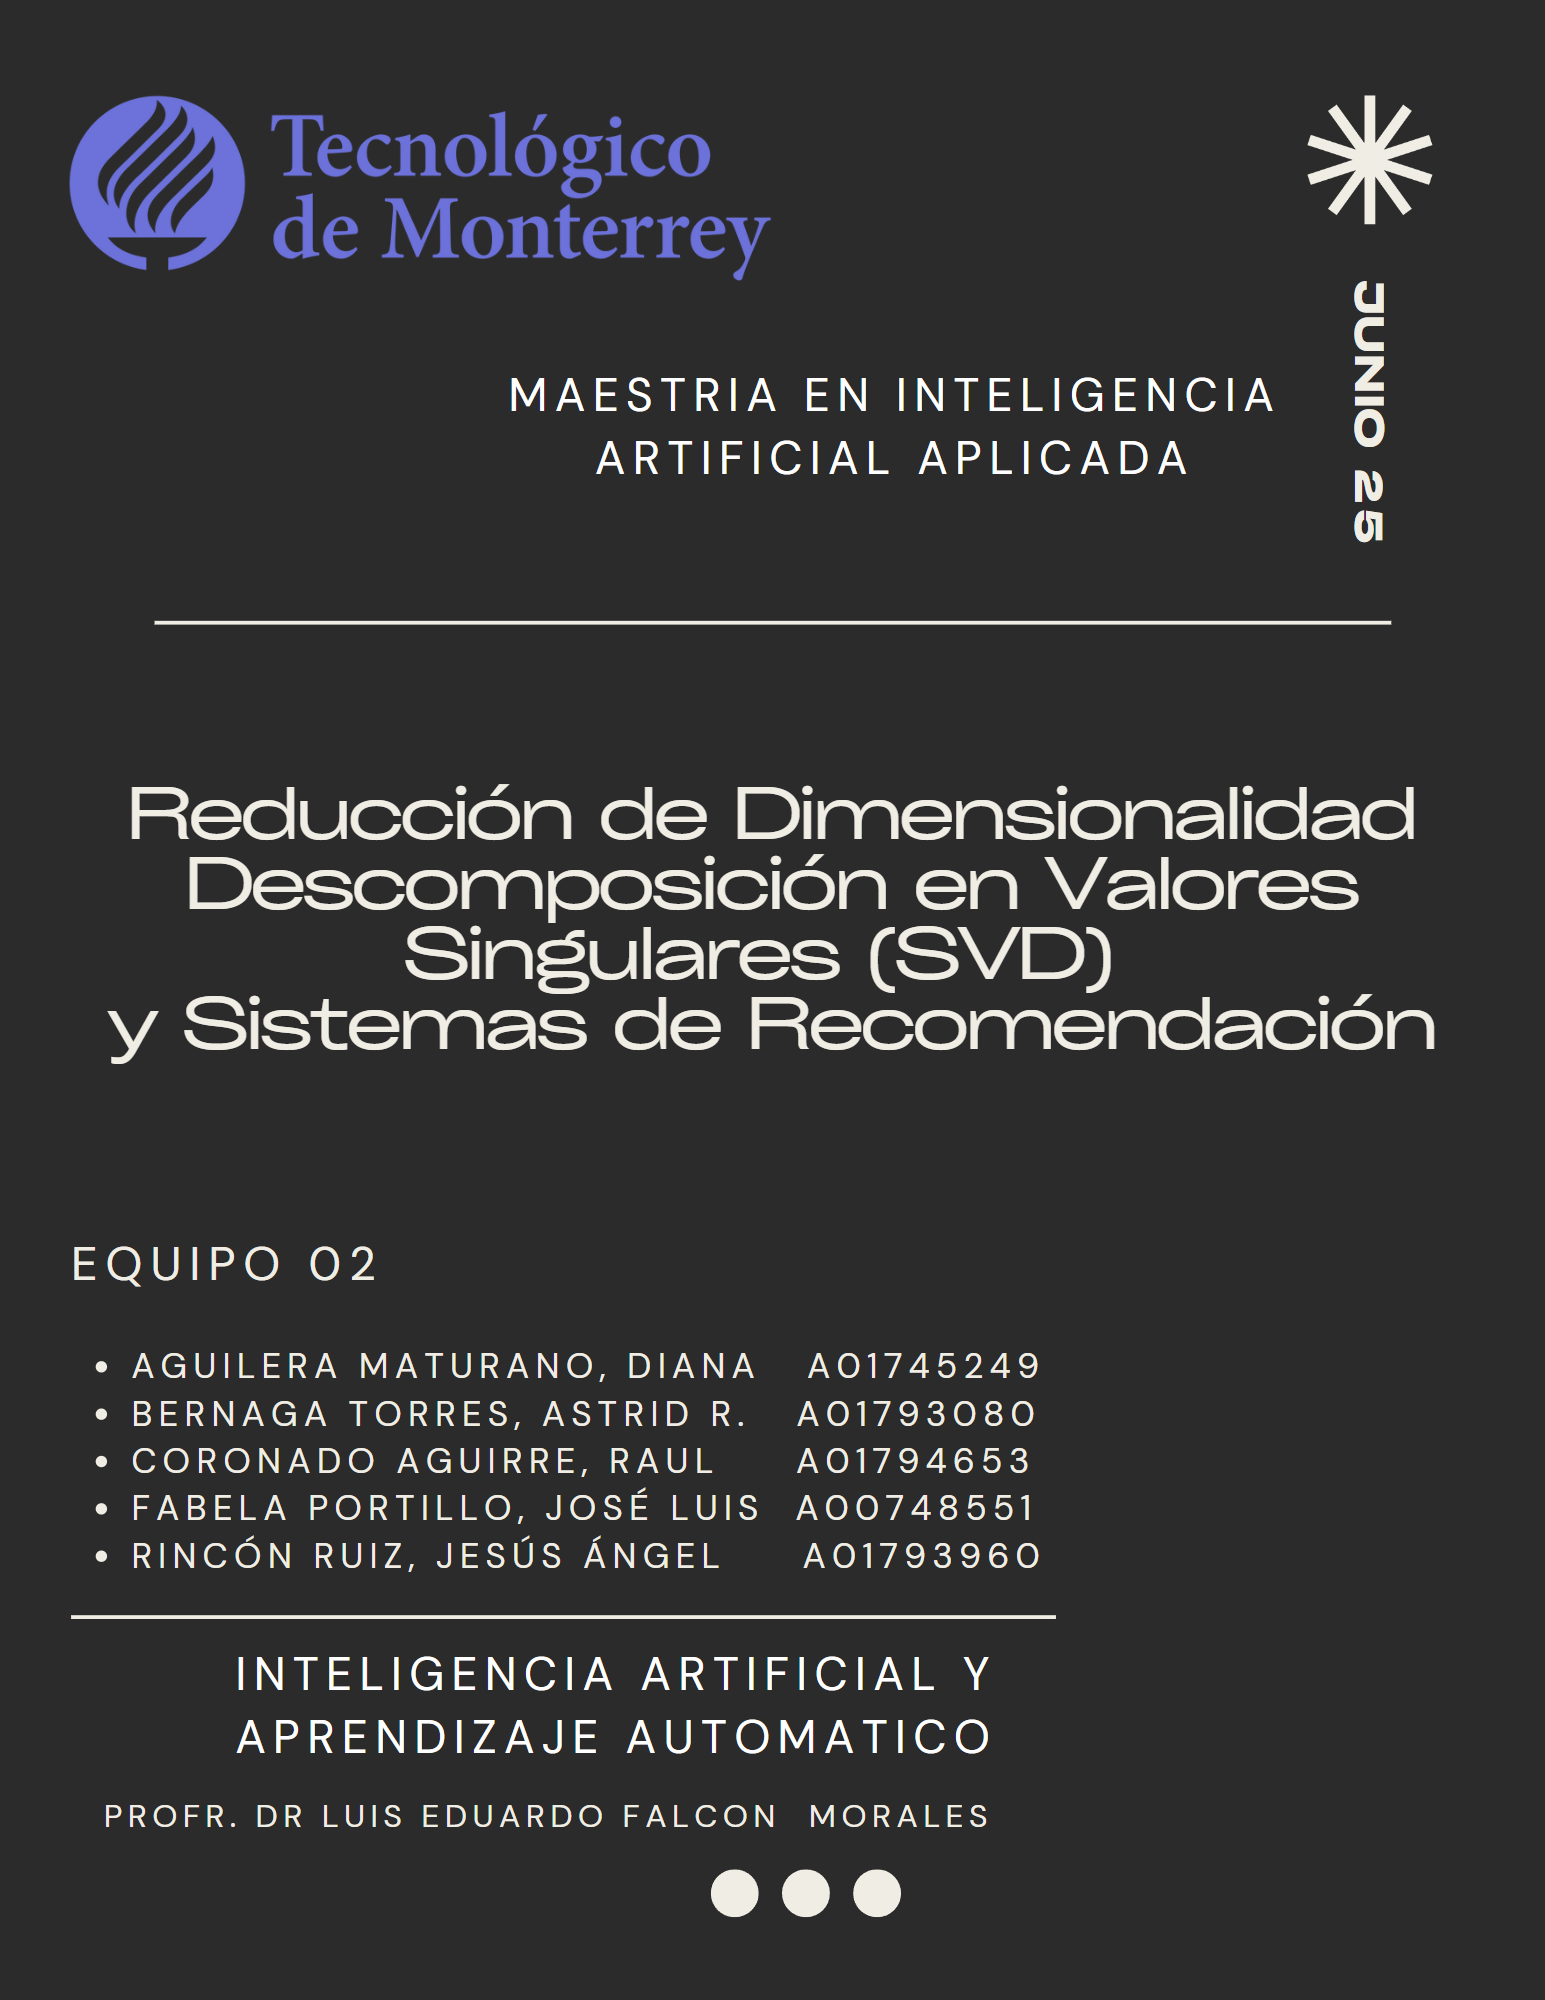

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

En particular se trabajará con los siguientes archvios, los cuales contienen la información mínima que requerimos para esta actividad: rating_final.csv y geoplaces2.csv.

In [1]:
# Importa los módulos necesarios
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importa clases o funciones específicas
from sklearn.decomposition import TruncatedSVD
from tabulate import tabulate

#**Ejercicio-1.**

Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega sus primeros 10 renglones.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#leyendo los archivos a utilizar

ratings_df = pd.read_csv("/content/drive/Shareddrives/Equipo 2_IA/Semana 10/restaurant+consumer+data/rating_final.csv")
print(ratings_df.shape)
ratings_df.head()

(1161, 5)


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [4]:
geoplace_df = pd.read_csv("/content/drive/Shareddrives/Equipo 2_IA/Semana 10/restaurant+consumer+data/geoplaces2.csv", encoding='latin-1')
print(geoplace_df.shape)
geoplace_df.head()

(130, 21)


,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [5]:
place_df = geoplace_df[['placeID','name']]
place_df

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata
...,...,...
125,132866,Chaires
126,135072,Sushi Itto
127,135109,Paniroles
128,135019,Restaurant Bar Coty y Pablo


In [6]:
#Uniendo Dataframes para generar tabla relacional para nuestro sistema de recomendación

tabla_relacional = pd.merge(ratings_df, place_df, on='placeID')   # dataFrame

print(tabla_relacional.shape)
tabla_relacional.head()

(1161, 6)


,userID,placeID,rating,food_rating,service_rating,name
0,U1077,135085,2,2,2,Tortas Locas Hipocampo
1,U1108,135085,1,2,1,Tortas Locas Hipocampo
2,U1081,135085,1,2,1,Tortas Locas Hipocampo
3,U1056,135085,2,2,2,Tortas Locas Hipocampo
4,U1134,135085,2,1,2,Tortas Locas Hipocampo


In [7]:
#Analizando un usuario y cómo ha calificado los restaurantes

idx = (tabla_relacional['userID']=='U1134')

print(idx.sum())  # total de restaurantes que ha visitado el usuario con id U1134.

tabla_relacional[idx]

16


,userID,placeID,rating,food_rating,service_rating,name
4,U1134,135085,2,1,2,Tortas Locas Hipocampo
66,U1134,132825,1,2,1,puesto de tacos
265,U1134,135046,2,1,1,Restaurante El Reyecito
276,U1134,135075,2,1,1,Mariscos El Pescador
290,U1134,132572,0,0,0,Cafe Chaires
304,U1134,135074,2,2,2,Restaurante la Parroquia Potosina
552,U1134,135044,1,1,1,Restaurant Wu Zhuo Yi
563,U1134,135047,1,1,1,Restaurante Casa de las Flores
573,U1134,132754,2,1,1,Cabana Huasteca
845,U1134,135026,0,0,0,la Cantina


In [8]:
#Generando nuestra matriz de utilidad

UtMx = tabla_relacional.pivot_table(values='rating', index='userID', columns='name', fill_value=0)

print(UtMx.shape) #tamaño de la matriz
UtMx.head(10)

(138, 129)


name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**NOTA:** Tenemos en la matriz 138 usuarios y 129 restaurantes que fueron evaluados; sin embargo, tenemos lo que se llama una matriz dispersa (sparse matrix), es decir, una matriz donde existe una gran cantidad de valores cero.

In [9]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx) / UtMx.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 907
Porcentaje de elementos diferentes de cero: 5.1%


#**Ejercicio-2.**

Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.

In [10]:
X = UtMx.T     # Tomamos la traspuesta para que los renglones sean los restaurantes y las columnas los usuarios.
X.shape

(129, 138)

In [11]:
# Obtengamos la cantidad de información contenida en la factorización SVD, considerando
# los valores singulares más representativos de dicha factorización.
# Para este caso inicial usaremos todos los vectores singulares, para luego
# compararlo con el caso al reducir su dimensión.

# El número de componentes debe ser menor que el número de características (features/usuarios), que son 943:
SVD = TruncatedSVD(n_components=138, random_state=1)
resultant_matrix = SVD.fit_transform(X)

print(resultant_matrix.shape)

#Cantidad de Valores Singullares utilizando la forma de matriz de valores singulares
print('Valores singulares totales', (SVD.singular_values_).shape[0])

(129, 129)
Valores singulares totales 129


#**Ejercicio-3.**

Usando la métrica de correlación de Pearson, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones.

In [12]:
# Obtengamos la matriz de correlación de Pearson entre todas las
# variables latentes de los restaurantes:

corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [13]:
me_gusta = "Subway"

names = UtMx.columns
names_list = list(names)
id_bien = names_list.index(me_gusta)

id_bien

88

In [14]:
# Veamos la correlación de Subway, con todas las que se tienen en el la lista de restaurantes:

corr_recomienda = corrMx[id_bien]
print(corr_recomienda.shape)
print(corr_recomienda)

(129,)
[-7.69028369e-04 -7.87822168e-05 -5.27330975e-03  8.58511349e-04
 -3.03891148e-03  3.97495832e-05 -1.54820208e-03 -5.29347145e-03
  7.27520383e-04 -1.55098452e-03 -1.84483094e-03  3.01090491e-01
 -3.06938616e-05 -3.66639157e-03 -2.28024815e-03 -1.70971180e-03
  2.66961340e-03  4.58467365e-04 -2.11449533e-03 -6.20445134e-03
  3.34268563e-03  1.16598607e-01  1.87080102e-03  2.53682556e-03
 -5.48801141e-03 -2.91288266e-03  2.02825342e-03 -1.36607265e-03
 -2.01695899e-03  1.12058244e-01 -2.36235727e-03  6.52159239e-04
  3.53495770e-03 -3.62793330e-03  1.69065407e-03 -4.51837401e-03
 -2.09301342e-03  2.34634298e-01 -3.80413494e-03 -5.11845710e-04
 -2.27148704e-03  3.88178002e-01 -2.07427108e-03 -2.29428835e-03
  1.32565455e-03  3.01002479e-01  1.71433518e-01 -3.29715354e-03
 -4.74480596e-03 -8.02527884e-04 -2.65071452e-03  1.12018889e-01
 -3.91080724e-03 -2.06369812e-03  1.16008629e-01  2.27855804e-01
  4.28342495e-04 -8.69739761e-04  6.09520875e-01 -6.43364064e-03
  4.25467169e-01 -

Vemos qué restaurantes están altamente correlacionadas con Subway. En particular se omiten las correlaciones iguales a uno o muy cercanas a ellas, la cual en particular estará el restaurante correlacionada consigo mismo. Por ejemplo, veamos cuál es el valor de correlación de Pearson de Subway, consigo misma

In [15]:
corr_recomienda[id_bien]

1.0

In [16]:
#Sacamos el TOP 10 de esta correlación sin contar el 1 ya que es Subway

top10_Subway = sorted(corr_recomienda, reverse =True)[1:11]
top10_Subway

[0.6095208746935304,
 0.5062776799761229,
 0.4298238308559067,
 0.4254671689089274,
 0.4172185013479393,
 0.38817800185258494,
 0.3010904910449609,
 0.3010024785497618,
 0.28514921973296764,
 0.23463429773400277]

In [17]:
#Seleccionemos entonces los restaurnates que se recomendaría a alguien que ha estado y le ha gustado Subway basado en los números del top 10:

list(names[(corr_recomienda < 1.0) & (corr_recomienda > 0.23)])

['Chilis Cuernavaca',
 'Log Yin',
 'Mariscos Tia Licha',
 'Mikasa',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Restaurant los Pinos',
 'Rincon del Bife',
 'Sanborns Casa Piedra',
 'Vips']

In [18]:
# Obtenemos la lista en orden con su respectivo valor de Pearson y en TOP 10
idx = (corr_recomienda < 1.0) & (corr_recomienda > 0.23)
tmp = []

for i in range(len(names[idx])):
    tmp.append((corr_recomienda[idx][i], names[idx][i]))

tmp_sorted = sorted(tmp, key=lambda x: x[0], reverse=True)

In [19]:
# Crear una lista para almacenar los datos de la tabla
table_data = []

# Construir los datos de la tabla para el top 10
for i, (correlation, restaurant_name) in enumerate(tmp_sorted[:10]):
    table_data.append([i + 1, restaurant_name, correlation*100])

# Imprimir la tabla
headers = ["Recomendación", "Nombre del Restaurante", "CorrelacionRating"]
print(tabulate(table_data, headers, tablefmt="grid"))

+-----------------+------------------------------------------------------+---------------------+
|   Recomendación | Nombre del Restaurante                               |   CorrelacionRating |
+=================+======================================================+=====================+
|               1 | Restaurant Teely                                     |             60.9521 |
+-----------------+------------------------------------------------------+---------------------+
|               2 | Vips                                                 |             50.6278 |
+-----------------+------------------------------------------------------+---------------------+
|               3 | Rincon del Bife                                      |             42.9824 |
+-----------------+------------------------------------------------------+---------------------+
|               4 | Restaurant and Bar and Clothesline Carlos N Charlies |             42.5467 |
+-----------------+-----------

In [20]:
r1 = np.concatenate(( np.vstack(names), np.vstack(corrMx[88])), axis = 1)
Resultado1= pd.DataFrame(r1, columns = ['Nombre', 'correlacionRating'])
Resultado1['correlacionRating'] = Resultado1['correlacionRating'].astype(float)
print(Resultado1.iloc[88,:])

Nombre               Subway
correlacionRating       1.0
Name: 88, dtype: object


In [21]:
Resultado1 = Resultado1[~(Resultado1['Nombre'] == me_gusta)]
Resultado1['correlacionRating'] *= 100
Resultado1_sorted = Resultado1.sort_values(by='correlacionRating', ascending=False)
print(Resultado1_sorted.head(10))

                                               Nombre  correlacionRating
58                                   Restaurant Teely          60.952087
97                                               Vips          50.627768
85                                    Rincon del Bife          42.982383
60  Restaurant and Bar and Clothesline Carlos N Ch...          42.546717
86                               Sanborns Casa Piedra          41.721850
41                                 Mariscos Tia Licha          38.817800
11                                  Chilis Cuernavaca          30.109049
45                                             Mikasa          30.100248
64                               Restaurant los Pinos          28.514922
37                                            Log Yin          23.463430


#**Ejercicio-4.**

Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen.

In [22]:
 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 943:
SVD = TruncatedSVD(n_components=138, random_state=1)
SVD.fit(X)

num_sv = 5   # En particular los 5 primeros vectores y valores singulares de mayor magnitud tienen esta cantidad de información.

print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum())))

Cantidad de información simplificada con los primeros 5 vectores singulares:
85.5%


In [23]:
# Usemos los primeras 5 componentes de dicha factorización.
# Es decir reducimos la dimensión de la matriz X con solamente sus primeras componentes:

num_sv = 5

SVD = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix1 = SVD.fit_transform(X)
resultant_matrix1.shape

(129, 5)

In [24]:
# Obtengamos la matriz de correlación de Pearson entre todas las
# variables latentes de los restaurantes:

corrMx1 = np.corrcoef(resultant_matrix1, )
corrMx1.shape

(129, 129)

In [25]:
# Veamos la correlación de Subway, con todas las que se tienen en el la lista de restaurantes:

corr_recomienda1 = corrMx1[id_bien]
print(corr_recomienda1.shape)
print(corr_recomienda1)

(129,)
[-0.22010451  0.9998414  -0.4533829  -0.19965743  0.99999333 -0.09249159
 -0.51567461  0.80880927  0.84303356 -0.11783396 -0.25438167  0.99999956
 -0.12534878 -0.279942   -0.14332764 -0.4809148   0.99997557  0.00228842
  0.03311614 -0.74821096  0.99995328  0.9999897  -0.37481021 -0.31008109
  0.83104021  0.83984531 -0.14650029 -0.38719195 -0.12274497  0.9999897
 -0.58710145  0.06999937 -0.38281662 -0.74505902 -0.21946456 -0.26738518
  0.8377747   0.99999768  0.99999297 -0.07651822 -0.31384729  0.99999961
  0.99999376 -0.34781704 -0.34751718  0.99999936  0.99999963 -0.65750426
  0.83713156 -0.06661794 -0.32539095  0.99999228 -0.30224613  0.11486574
  0.99999079  0.99999413 -0.30667786  0.05664052  0.99999977 -0.38749889
  0.99999939 -0.08133972 -0.10470881  0.16412164  0.99999146 -0.23095414
 -0.07533652  0.09447888 -0.19035737 -0.19338679 -0.60723812 -0.17213216
 -0.39520686 -0.38968384 -0.04037689 -0.41128509 -0.9750213   0.05531435
 -0.60259975 -0.19596584 -0.37377694 -0.04426

In [26]:
corr_recomienda1[id_bien]

1.0

In [27]:
#Sacamos el TOP 10 de esta correlación sin contar el 1 ya que es Subway

top10_Subway = sorted(corr_recomienda1, reverse =True)[1:11]
top10_Subway

[0.9999999894480852,
 0.9999997693405236,
 0.9999996263513504,
 0.9999996060101858,
 0.9999995627258291,
 0.9999993902607883,
 0.9999993557491793,
 0.9999986081118017,
 0.9999976758781074,
 0.999995331902949]

In [28]:
#Seleccionemos entonces los restaurnates que se recomendaría a alguien que ha estado y le ha gustado Subway basado en los números del top 10:

list(names[(corr_recomienda1 < 1.0) & (corr_recomienda1 > 0.98)])

['Arrachela Grill',
 'Cafeteria cenidet',
 'Chilis Cuernavaca',
 'El Oceano Dorado',
 'El cotorreo',
 'Giovannis',
 'Kiku Cuernavaca',
 'Log Yin',
 'Los Vikingos',
 'Mariscos Tia Licha',
 'McDonalds Centro',
 'Mikasa',
 'Paniroles',
 'Restaurant Bar Coty y Pablo',
 'Restaurant Familiar El Chino',
 'Restaurant Las Mananitas',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Restaurant los Pinos',
 'Rincon del Bife',
 'Sanborns Casa Piedra',
 'Vips']

In [29]:
#Obtenemos la lista en orden con su respectivo valor de pearson y en TOP 10 con 5 componentes
idx = (corr_recomienda1 < 1.0) & (corr_recomienda1 > 0.98)
tmp = list()

for i in range(len(names[idx])):
    tmp.append((corr_recomienda1[idx][i], names[idx][i]))

# Ordenar la lista de recomendaciones en orden descendente por el valor de Pearson
tmp_sorted = sorted(tmp, key=lambda x: x[0], reverse=True)

# Crear una lista para almacenar los datos de la tabla
table_data = []

# Construir los datos de la tabla
for i, (pearson_value, restaurant_name) in enumerate(tmp_sorted[:10]):
    table_data.append([i + 1, restaurant_name, pearson_value])

# Imprimir la tabla
headers = ["Recomendación", "Nombre del Restaurante", "Valor de Pearson"]
print(tabulate(table_data, headers, tablefmt="grid"))

+-----------------+------------------------------------------------------+--------------------+
|   Recomendación | Nombre del Restaurante                               |   Valor de Pearson |
+=================+======================================================+====================+
|               1 | Rincon del Bife                                      |           1        |
+-----------------+------------------------------------------------------+--------------------+
|               2 | Restaurant Teely                                     |           1        |
+-----------------+------------------------------------------------------+--------------------+
|               3 | Paniroles                                            |           1        |
+-----------------+------------------------------------------------------+--------------------+
|               4 | Mariscos Tia Licha                                   |           1        |
+-----------------+---------------------

**Lista obtenida en el ejercicio 3:**
- (0.6095208746935304, 'Restaurant Teely')
- (0.5062776799761229, 'Vips'),
- (0.4298238308559067, 'Rincon del Bife'),
- (0.4254671689089274, 'Restaurant and Bar and Clothesline Carlos N Charlies'),
- (0.4172185013479393, 'Sanborns Casa Piedra'),
- (0.38817800185258494, 'Mariscos Tia Licha'),
- (0.3010904910449609, 'Chilis Cuernavaca'),
- (0.3010024785497618, 'Mikasa'),
- (0.28514921973296764, 'Restaurant los Pinos'),
- (0.23463429773400277, 'Log Yin')

Comparando la lista del ejercicio 3 que contiene todos los valores singualres de la matriz, con 5 valores singulares, obtenemos 9 de 10 coincidencias en la lista de recomendaciones de aquellos que les gustan Subway. El restaurante que no conincide en la lista del ejercico 3 con 5 valores singulares es el de Paniroles. Lo cuál eso nos dice que reduciendo las dimensiones a un 85%, podemos obtener una buena coincidencia.

#**Ejercicio-5.**

Repite el ejercicio con el restaurante “"tacos de barbacoa enfrente del Tec". Incluye tus conclusiones.

In [30]:
me_gusta = "tacos de barbacoa enfrente del Tec"

names = UtMx.columns
names_list = list(names)
id_bien = names_list.index(me_gusta)

id_bien

124

In [31]:
# Veamos la correlación de "tacos de barbacoa enfrente del Tec" con todas las que se tienen en el la lista de restaurantes:

corr_recomienda2 = corrMx[id_bien]
corr_recomienda2[id_bien] #correlación consigo mismo

1.0

In [32]:
#Sacamos el TOP 10 de esta correlación sin contar el 1 ya que es Tacos de barbacoa enfrente del Tec

top10_TacosDeBarbacoa = sorted(corr_recomienda2, reverse =True)[1:11]
top10_TacosDeBarbacoa

[0.8171889849105259,
 0.6653053654632725,
 0.6538492684416574,
 0.4371842084263571,
 0.4127645231848369,
 0.4077949201812991,
 0.25847938542624965,
 0.19517408801078187,
 0.19112045068234843,
 0.17093947240845134]

In [33]:
#Obtenemos la lista en orden con su respectivo valor de pearson y en TOP 10 con 5 componentes
idx = (corr_recomienda2 < 0.9999999999999998) & (corr_recomienda2 > 0.98)
tmp = list()

for i in range(len(names[idx])):
  tmp.append((corr_recomienda2[idx][i], names[idx][i]))

sorted(tmp, key=lambda x:x[0], reverse=True)[:10]

[]

In [34]:
# Obtener el índice del valor de correlación más alto (primera recomendación)
max_correlation_idx = np.argmax(corr_recomienda2)

# Obtener los índices de los top 10 valores más altos de correlación, excluyendo la primera recomendación
top_10_tacos = np.argsort(corr_recomienda2)[-11:][::-1]  # Se utiliza -11 en lugar de -10 para excluir la primera recomendación

# Eliminar el índice correspondiente a la primera recomendación
top_10_tacos = top_10_tacos[top_10_tacos != max_correlation_idx]

# Crear una lista para almacenar los datos de la tabla
table_data = []

# Construir los datos de la tabla para el top 10 de recomendaciones correlacionadas
for i, idx in enumerate(top_10_tacos):
    restaurant_name = names[idx]  # Obtener el nombre del restaurante
    correlation = corr_recomienda2[idx]  # Obtener la correlación correspondiente
    table_data.append([i+1, restaurant_name, correlation*100])

# Imprimir la tabla
headers = ["Recomendación", "Restaurante", "Correlación"]
print(tabulate(table_data, headers, tablefmt="grid"))

+-----------------+---------------------------------------+---------------+
|   Recomendación | Restaurante                           |   Correlación |
+=================+=======================================+===============+
|               1 | vips                                  |       81.7189 |
+-----------------+---------------------------------------+---------------+
|               2 | tacos abi                             |       66.5305 |
+-----------------+---------------------------------------+---------------+
|               3 | little pizza Emilio Portes Gil        |       65.3849 |
+-----------------+---------------------------------------+---------------+
|               4 | Taqueria EL amigo                     |       43.7184 |
+-----------------+---------------------------------------+---------------+
|               5 | puesto de gorditas                    |       41.2765 |
+-----------------+---------------------------------------+---------------+
|           

Observamos que tenemos una correlación casi 1 utilizando 5 valores singulares y observando los nombres de los restaurantes, se puede decir que el gusto es parecido si a una persona le gusta los tacos de barbacoa enfrente del Tec.

La tabla proporciona una lista de recomendaciones ordenadas por correlación descendente. Estas recomendaciones pueden servir como una guía inicial para explorar otros restaurantes que podrían ser de interés para alguien a quien le haya gustado "tacos de barbacoa enfrente del Tec". Sin embargo, es importante considerar también otros factores como la ubicación, el tipo de cocina, las reseñas de los clientes y las preferencias personales al tomar una decisión final.

#**Ejercicio-6.**

Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluación dada a la comida (food_rating). Incluye tus conclusiones.

In [35]:
#Generando nuestra matriz de utilidad

rating=pd.merge(ratings_df[['userID', 'placeID', 'food_rating']], geoplace_df[['placeID','name']], on = 'placeID')

UtMx1 = rating.pivot_table(values='food_rating', index='userID', columns='name', fill_value=0)

print(UtMx1.shape) #tamaño de la matriz
UtMx1.head(10)

(138, 129)


name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx1.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx1)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx1) / UtMx1.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 895
Porcentaje de elementos diferentes de cero: 5.0%


La matriz de utilidad tiene un total de 17,802 elementos. Sin embargo, solo hay 895 elementos diferentes de cero, lo que representa solo el 5.0% del total. Esto indica que la mayoría de las evaluaciones en la matriz de utilidad son cero, lo que significa que la mayoría de los usuarios no han evaluado los restaurantes.

In [37]:
X = UtMx1.T
X.shape

(129, 138)

In [38]:
ratings_df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [39]:
SVD = TruncatedSVD(n_components=137, random_state=1)
SVD.fit(X)

resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(129, 129)

In [40]:
corrMx = np.round(np.corrcoef(resultant_matrix)*100,2)
corrMx.shape

(129, 129)

In [41]:
me_gusta = "Subway"

names = UtMx1.columns
names_list = list(names)
id_bien = names_list.index(me_gusta)

id_bien

88

In [42]:
a = np.concatenate((np.vstack(names), np.vstack(corrMx[88])), axis=1)
Resultado = pd.DataFrame(a, columns=["Nombre", "correlacionFood"])
Resultado["correlacionFood"] = Resultado["correlacionFood"].astype(float)
Resultado = Resultado[~(Resultado['Nombre'] == 'Subway')]
Resultado = Resultado.sort_values(by=['correlacionFood'], ascending=False)
final2 = Resultado.head(10)
final2

,Nombre,correlacionFood
58,Restaurant Teely,81.64
60,Restaurant and Bar and Clothesline Carlos N Ch...,46.89
97,Vips,44.21
41,Mariscos Tia Licha,41.52
85,Rincon del Bife,38.18
86,Sanborns Casa Piedra,36.57
55,Restaurant Las Mananitas,33.17
46,Paniroles,31.21
29,Kiku Cuernavaca,25.04
54,Restaurant Familiar El Chino,23.27


Se calculó la correlación del restaurante "Subway" con los demás restaurantes utilizando la matriz de reducción. Los resultados muestran los 10 restaurantes más correlacionados positivamente con "Subway" en términos de evaluaciones de comida.

#**Ejercicio-7.**

Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluación dada al servicio (service_rating). Incluye tus conclusiones.

In [43]:
#Generando nuestra matriz de utilidad

UtMx2 = tabla_relacional.pivot_table(values='service_rating', index='userID', columns='name', fill_value=0)

print(UtMx2.shape) #tamaño de la matriz
UtMx2.head(10)

(138, 129)


name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx2.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx2)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx2) / UtMx2.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 846
Porcentaje de elementos diferentes de cero: 4.8%


In [45]:
ratings_df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [46]:
rating = pd.merge(ratings_df[['userID', 'placeID', 'service_rating']], geoplace_df[['placeID','name']], on = 'placeID')
UtMx2 = rating.pivot_table(values = 'service_rating', index = 'userID', columns = 'name', fill_value = 0)

In [47]:
#Dimensiones de la matriz
UtMx2.shape

(138, 129)

In [48]:
UtMx2.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = UtMx2.T
X.shape

(129, 138)

In [50]:
SVD = TruncatedSVD(n_components=137, random_state=1)
SVD.fit(X)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(129, 129)

In [51]:
corrMx = np.round(np.corrcoef(resultant_matrix, ),2)
corrMx.shape

(129, 129)

In [52]:
me_gusta = "Subway"

names = UtMx2.columns
names_list = list(names)
id_bien = names_list.index(me_gusta)

id_bien

88

In [53]:
b = np.concatenate((np.vstack(names), np.vstack(corrMx[88]*100.0)), axis=1)
Resultado3 = pd.DataFrame(b, columns = ['Nombre', 'correlacionService'])
Resultado3['correlacionService'] = Resultado3['correlacionService'].astype(float)
Resultado3 = Resultado3[~(Resultado3['Nombre'] == 'Subway')]
Resultado3 = Resultado3.sort_values(by = ['correlacionService'], ascending=False)
final3 = Resultado3.head(10)
final3

,Nombre,correlacionService
58,Restaurant Teely,77.0
60,Restaurant and Bar and Clothesline Carlos N Ch...,60.0
85,Rincon del Bife,52.0
97,Vips,42.0
46,Paniroles,37.0
55,Restaurant Las Mananitas,23.0
11,Chilis Cuernavaca,23.0
21,Giovannis,19.0
29,Kiku Cuernavaca,18.0
54,Restaurant Familiar El Chino,18.0


In [54]:
print('-----------------------Ejercicio 1--------------')
print(Resultado1_sorted.head(10))
print('-----------------------Ejercicio 2--------------')
print(final2.head(10))
print('-----------------------Ejercicio 3--------------')
print(final3)

-----------------------Ejercicio 1--------------
                                               Nombre  correlacionRating
58                                   Restaurant Teely          60.952087
97                                               Vips          50.627768
85                                    Rincon del Bife          42.982383
60  Restaurant and Bar and Clothesline Carlos N Ch...          42.546717
86                               Sanborns Casa Piedra          41.721850
41                                 Mariscos Tia Licha          38.817800
11                                  Chilis Cuernavaca          30.109049
45                                             Mikasa          30.100248
64                               Restaurant los Pinos          28.514922
37                                            Log Yin          23.463430
-----------------------Ejercicio 2--------------
                                               Nombre  correlacionFood
58                          

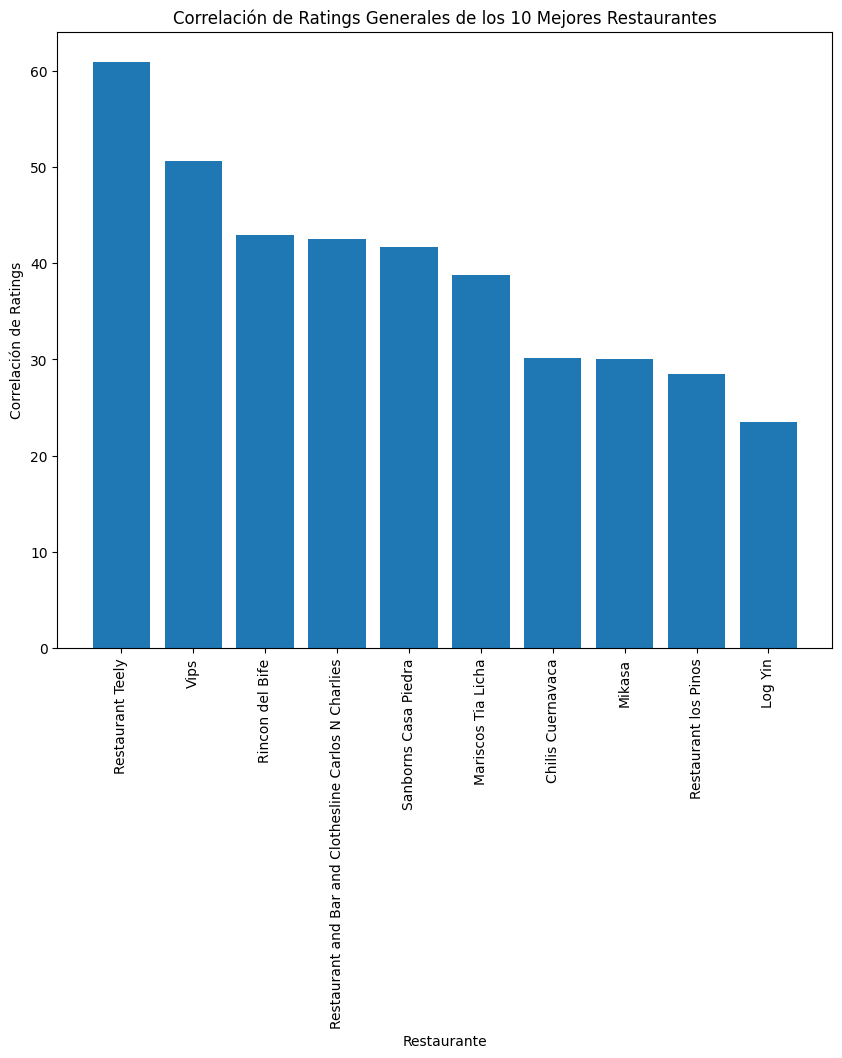

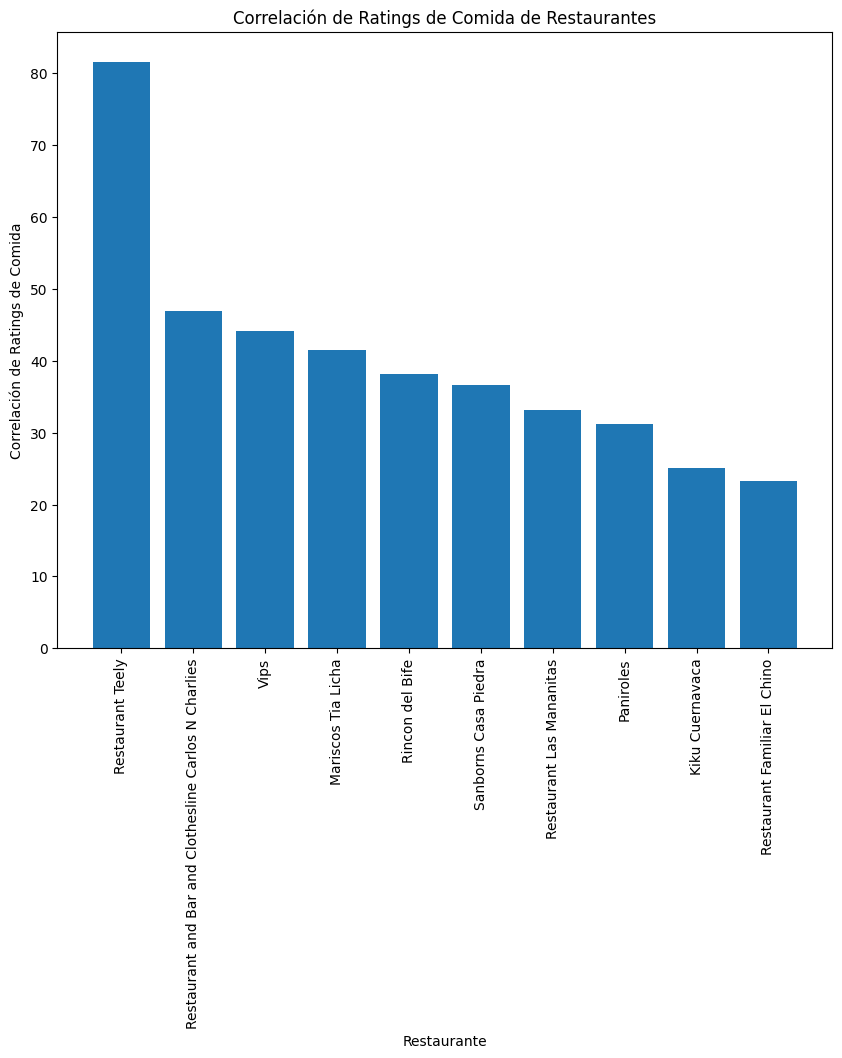

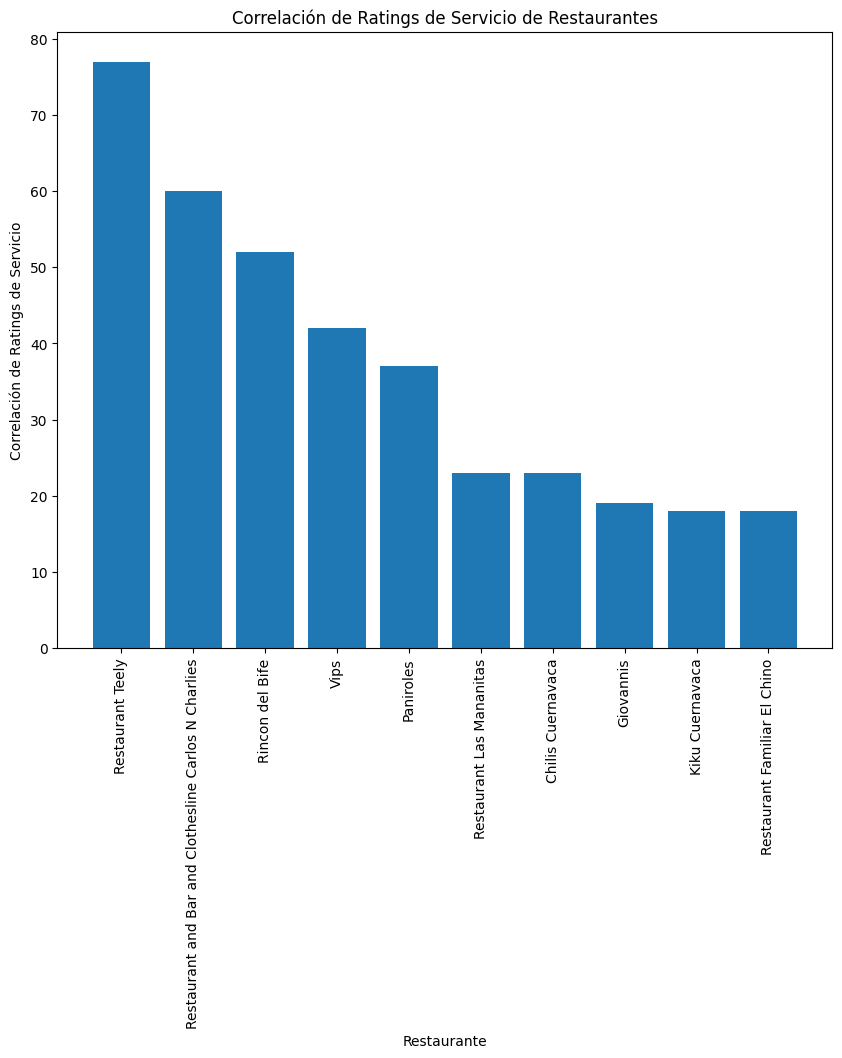

In [55]:
top_10_ratings_generales = Resultado1.nlargest(10, 'correlacionRating')

# Gráfica de correlación de los ratings generales (solo los 10 primeros restaurantes)
plt.figure(figsize=(10, 8))
plt.bar(top_10_ratings_generales['Nombre'], top_10_ratings_generales['correlacionRating'])
plt.xlabel('Restaurante')
plt.ylabel('Correlación de Ratings')
plt.title('Correlación de Ratings Generales de los 10 Mejores Restaurantes')
plt.xticks(rotation=90)
plt.show()

# Gráfica de correlación de los ratings de comida
plt.figure(figsize=(10, 8))
plt.bar(final2['Nombre'], final2['correlacionFood'])
plt.xlabel('Restaurante')
plt.ylabel('Correlación de Ratings de Comida')
plt.title('Correlación de Ratings de Comida de Restaurantes')
plt.xticks(rotation=90)
plt.show()

# Gráfica de correlación de los ratings de servicio
plt.figure(figsize=(10, 8))
plt.bar(final3['Nombre'], final3['correlacionService'])
plt.xlabel('Restaurante')
plt.ylabel('Correlación de Ratings de Servicio')
plt.title('Correlación de Ratings de Servicio de Restaurantes')
plt.xticks(rotation=90)
plt.show()


#**Ejercicio-8.**

Incluye tus conclusiones finales. En particular indica la coincidencia o no de estos tres modelos.


 En el primer ejercicio, se obtuvieron las correlaciones de las evaluaciones generales de los usuarios para los diferentes restaurantes. Los restaurantes con las correlaciones más altas son "Restaurant Teely" y "Vips", seguidos de "Rincon del Bife" y "Restaurant and Bar and Clothesline Carlos N Ch". Esto indica que los usuarios que calificaron positivamente un restaurante también tienden a calificar positivamente a estos restaurantes con altas correlaciones. Conn diferencia en los resultados de los siguientes ejercicios

Ejercicio 6 (correlación de evaluaciones de comida): En este ejercicio, se calculó la correlación de las evaluaciones de comida de los usuarios para los restaurantes. Los resultados muestran que "Restaurant Teely" tiene la correlación más alta con "Subway", seguido de "Restaurant and Bar and Clothesline Carlos N Ch...", "Vips" y "Mariscos Tia Licha". Aunque los resultados no coinciden exactamente con el ejercicio 1, algunos restaurantes como "Restaurant Teely" y "Vips" aparecen en ambos ejercicios con altas correlaciones.

Ejercicio 7 (correlación de evaluaciones de servicio): En este ejercicio, se calculó la correlación de las evaluaciones de servicio de los usuarios para los restaurantes. Los resultados muestran que "Restaurant Teely" tiene la correlación más alta con "Subway", seguido de "Restaurant and Bar and Clothesline Carlos N Ch...", "Rincon del Bife" y "Vips". Nuevamente, algunos restaurantes como "Restaurant Teely" y "Vips" aparecen en diferentes ejercicios con altas correlaciones.

En general, aunque no hay una coincidencia exacta entre los tres modelos en términos de los restaurantes con las correlaciones más altas, se pueden observar algunas similitudes. "Restaurant Teely" y "Vips" son dos restaurantes que aparecen con altas correlaciones en los tres ejercicios, lo que podría indicar que estos restaurantes tienen evaluaciones consistentemente positivas en diferentes aspectos (evaluaciones generales, comida y servicio).

###**Fin de la Actividad de la semana 10 - Sistemas de Recomendación y Reducción de Dimensionalidad con SVD.**